<a href="https://colab.research.google.com/github/Padmashree02/Deforestation-Analysis---Computer-Vision/blob/main/RGB_Deforestation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#imported required libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import Image
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['image.cmap'] = 'gray'

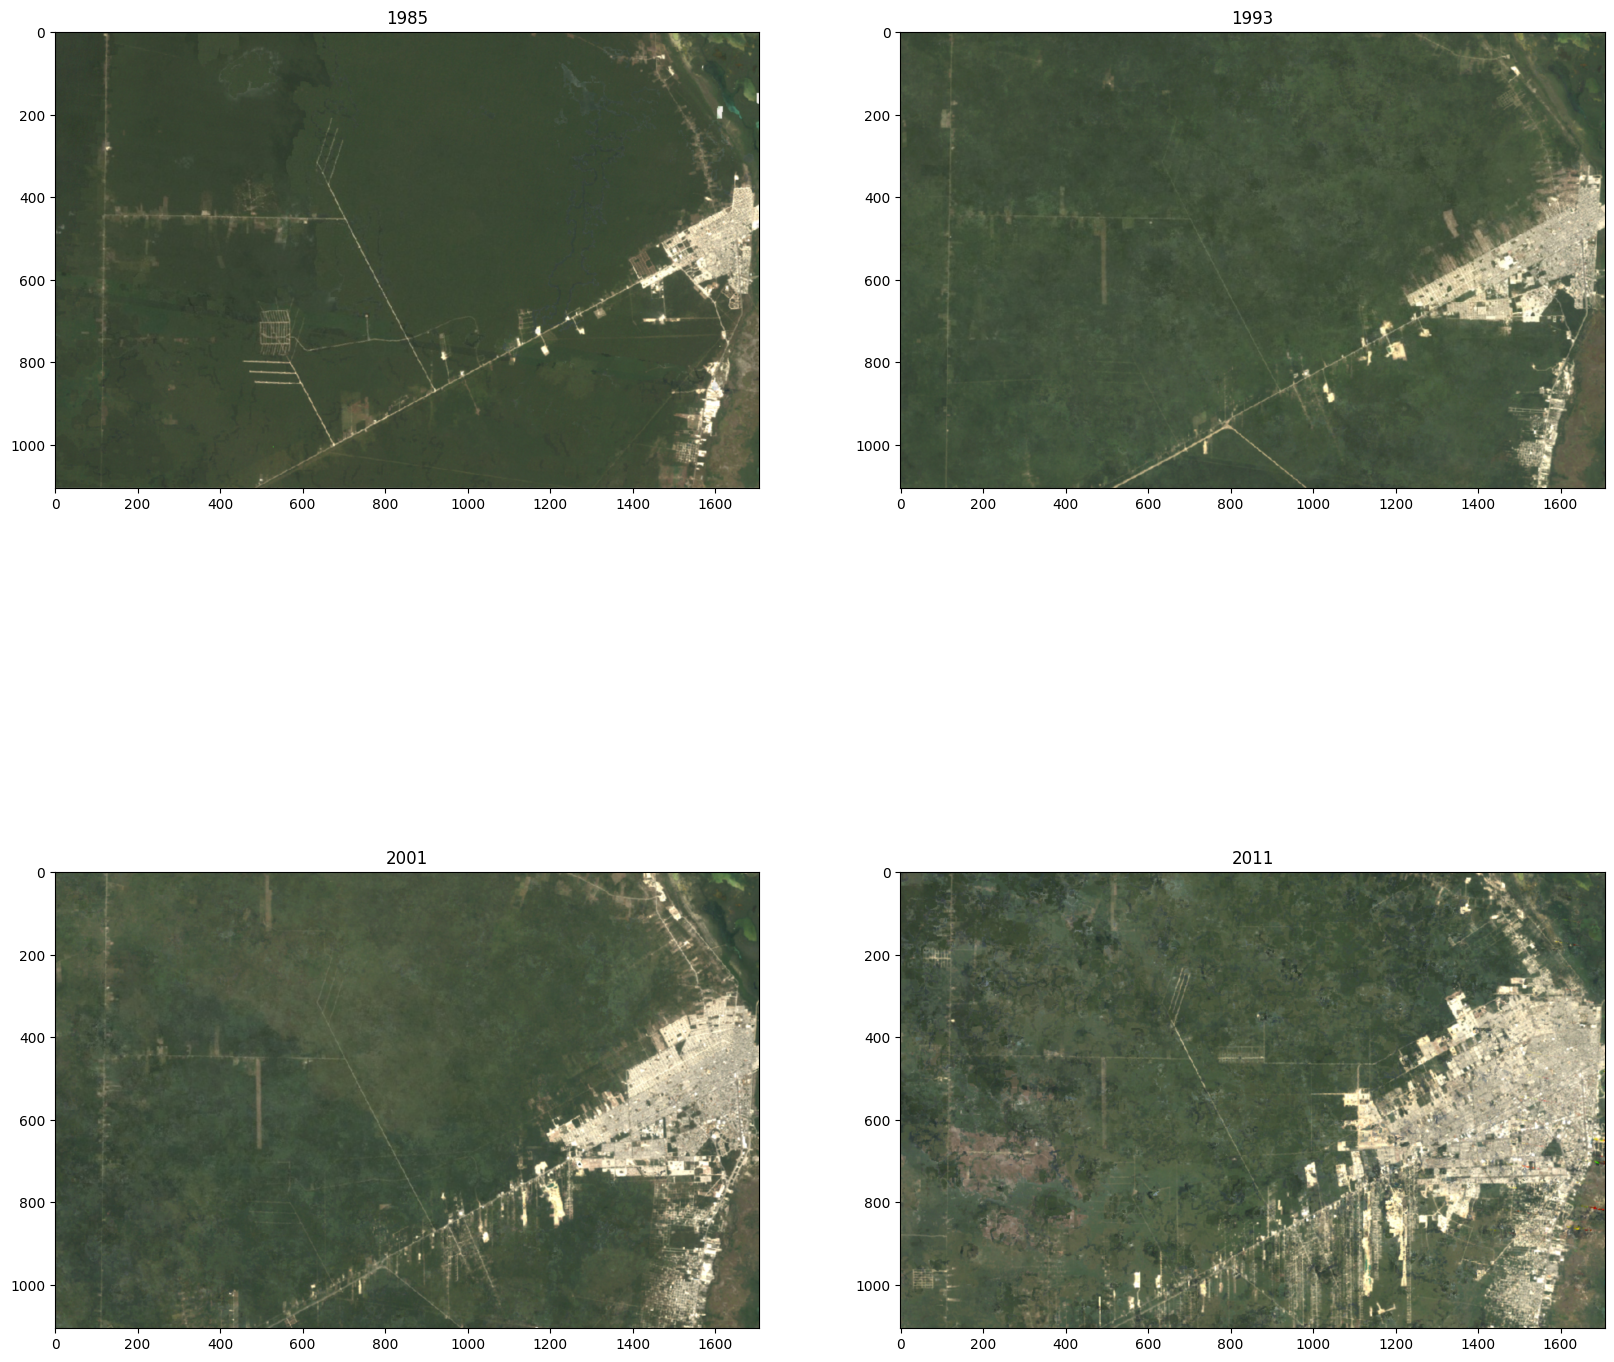

In [2]:
#Read the image as an input data
f1985=cv2.imread('/content/1985.png')
f1993=cv2.imread('/content/1993.png')
f2001=cv2.imread('/content/2001.png')
f2011=cv2.imread('/content/2011.png')

#Display of the input images
plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(f1985[:,:,::-1]);plt.title('1985')
plt.subplot(222);plt.imshow(f1993[:,:,::-1]);plt.title('1993')
plt.subplot(223);plt.imshow(f2001[:,:,::-1]);plt.title('2001')
plt.subplot(224);plt.imshow(f2011[:,:,::-1]);plt.title('2011');

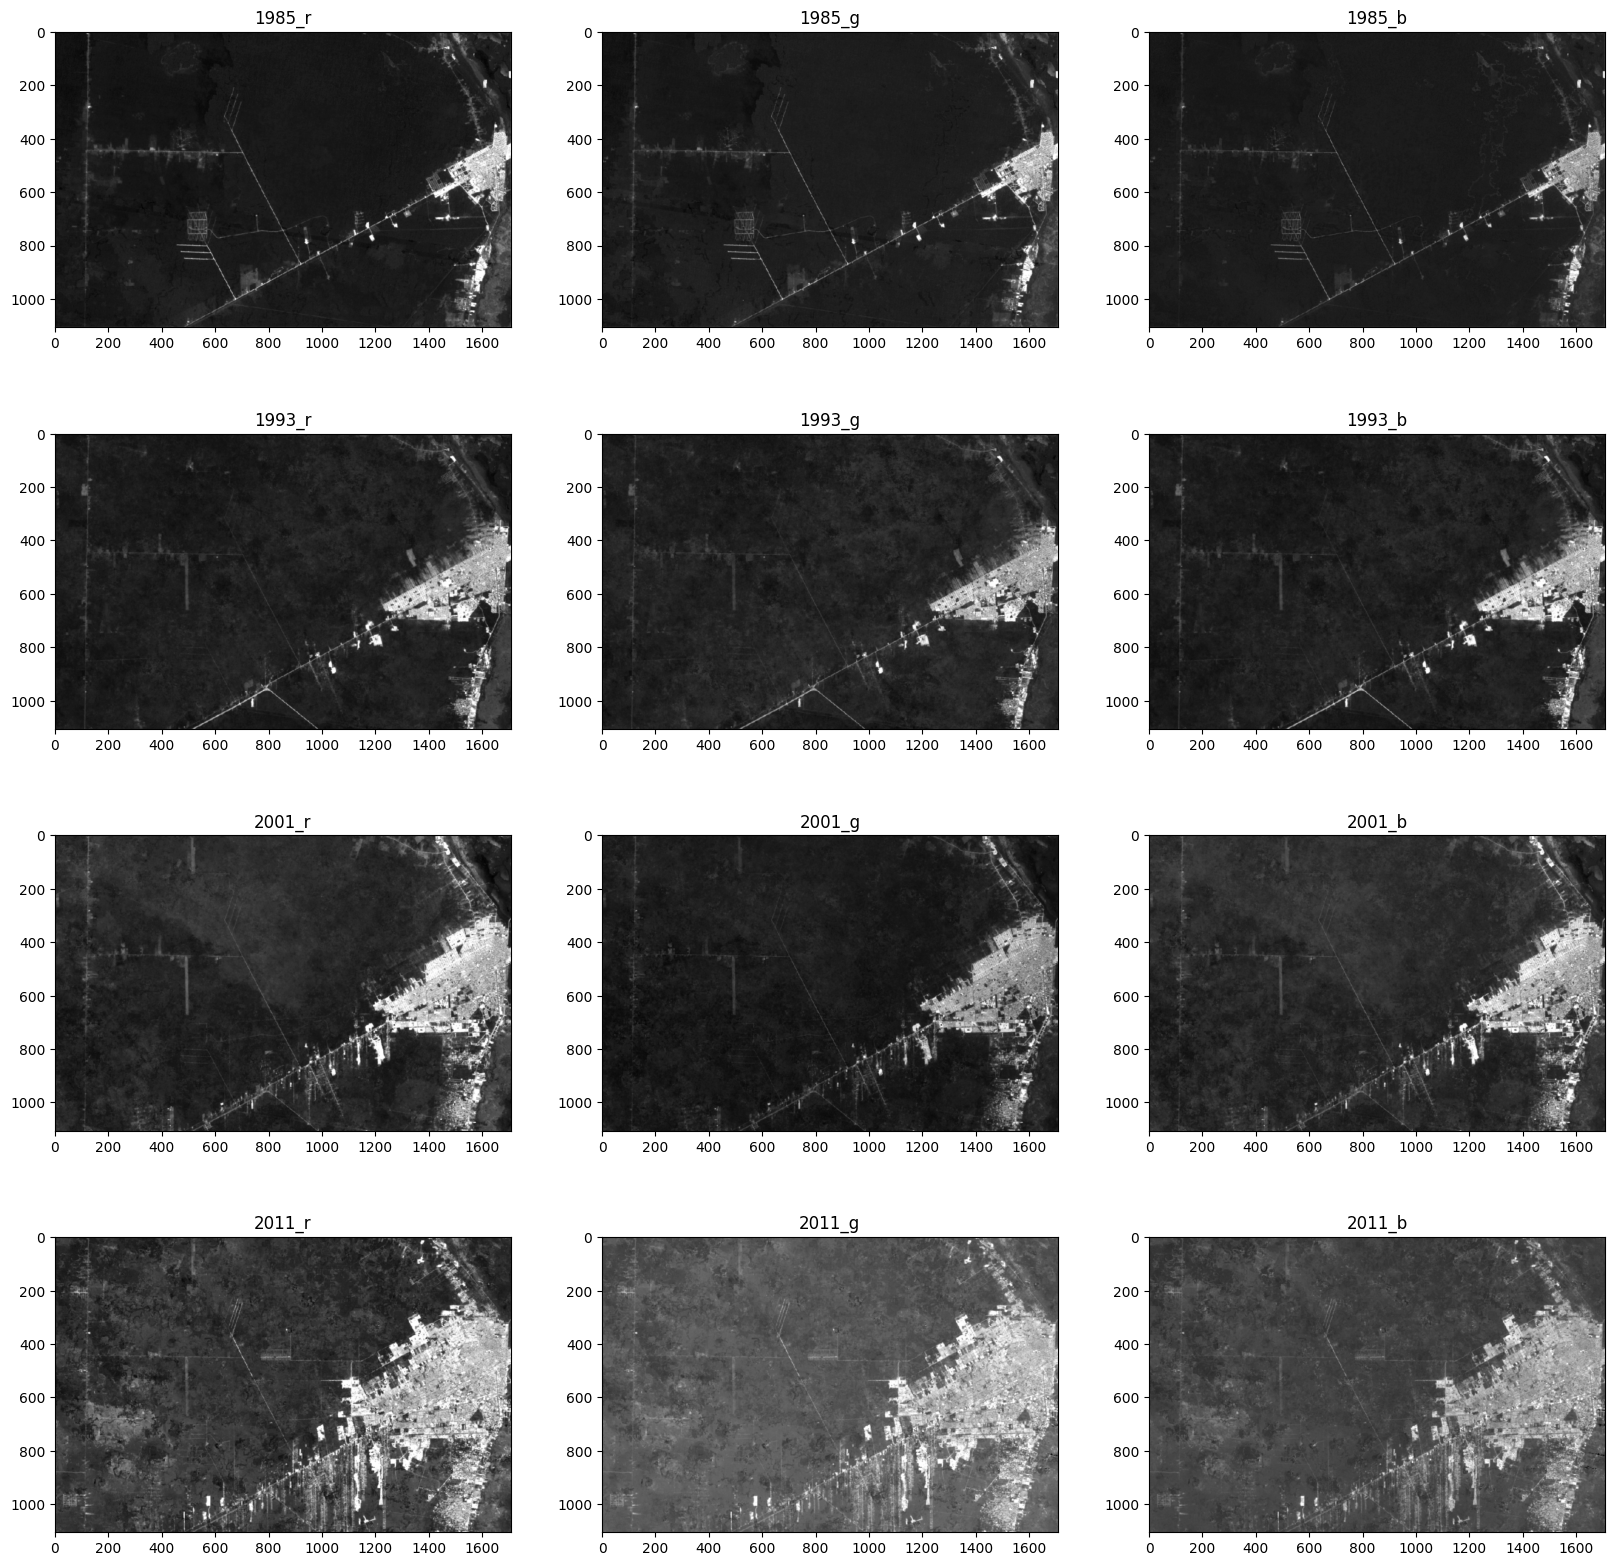

In [3]:
#Pre-processing step

#Spliting the origional image's channel
b1,g1,r1=cv2.split(f1985)
b2,g2,r2=cv2.split(f1993)
b3,g3,r3=cv2.split(f2001)
b4,g4,r4=cv2.split(f2011)

#Display of the each year's satelite image into R,G,B channels
plt.figure(figsize=[20,20])
plt.subplot(4,3,1);plt.imshow(r1);plt.title('1985_r')
plt.subplot(4,3,2);plt.imshow(g1);plt.title('1985_g')
plt.subplot(4,3,3);plt.imshow(b1);plt.title('1985_b')
plt.subplot(4,3,4);plt.imshow(r2);plt.title('1993_r')
plt.subplot(4,3,5);plt.imshow(g2);plt.title('1993_g')
plt.subplot(4,3,6);plt.imshow(r2);plt.title('1993_b')
plt.subplot(4,3,7);plt.imshow(r3);plt.title('2001_r')
plt.subplot(4,3,8);plt.imshow(b3);plt.title('2001_g')
plt.subplot(4,3,9);plt.imshow(g3);plt.title('2001_b')
plt.subplot(4,3,10);plt.imshow(r4);plt.title('2011_r')
plt.subplot(4,3,11);plt.imshow(g4);plt.title('2011_g')
plt.subplot(4,3,12);plt.imshow(b4);plt.title('2011_b');

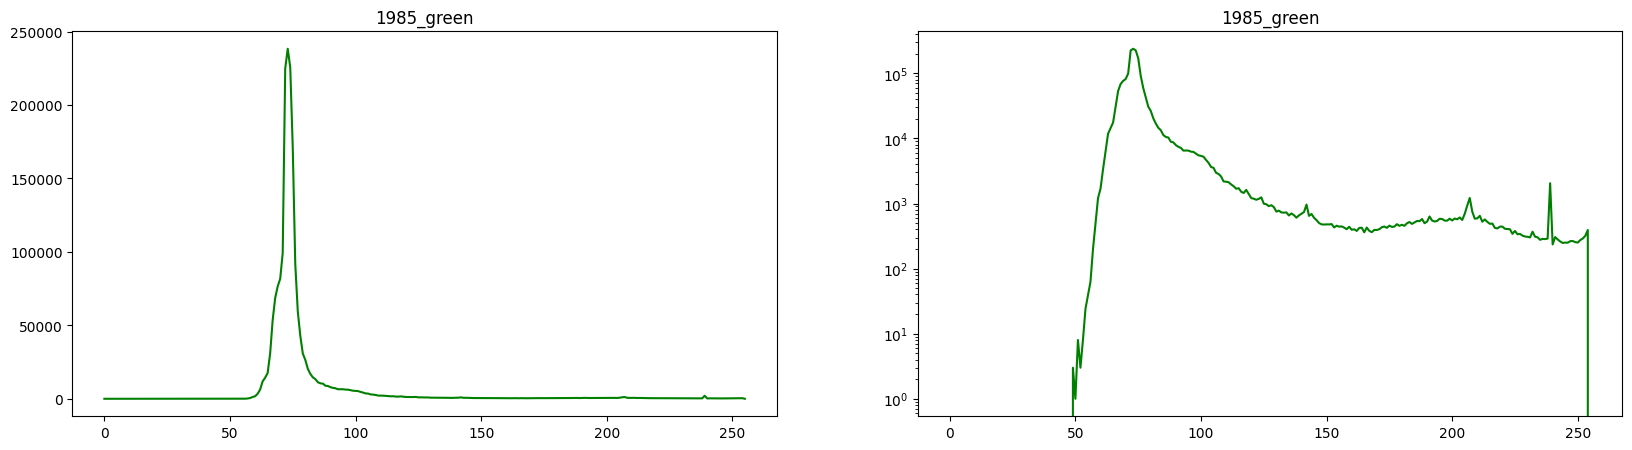

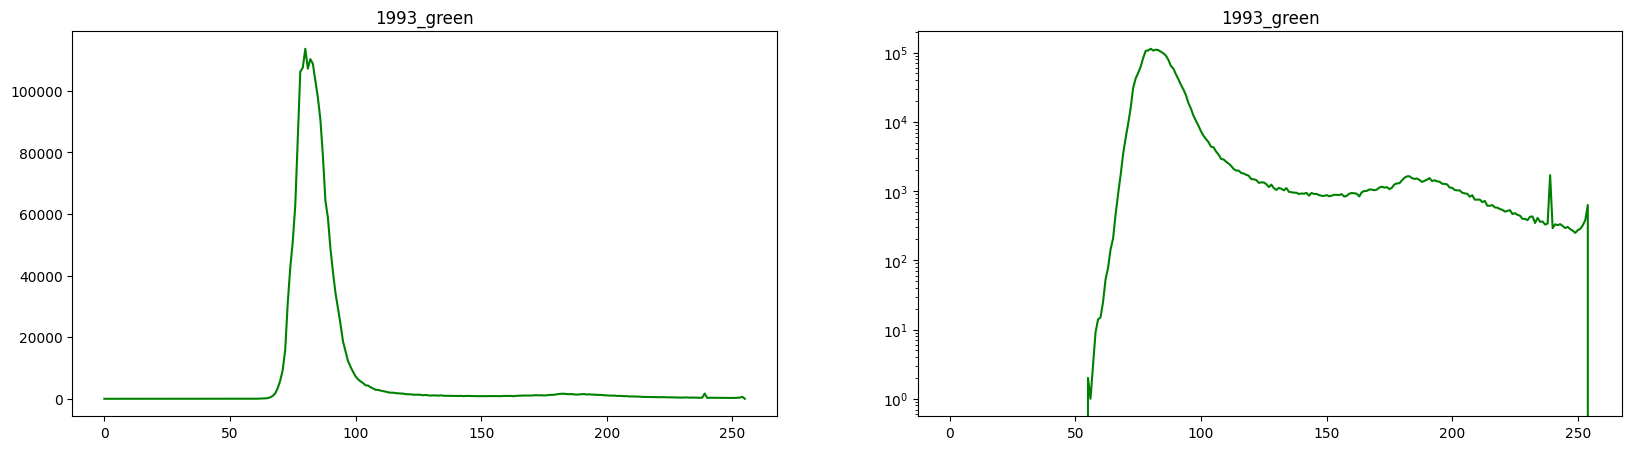

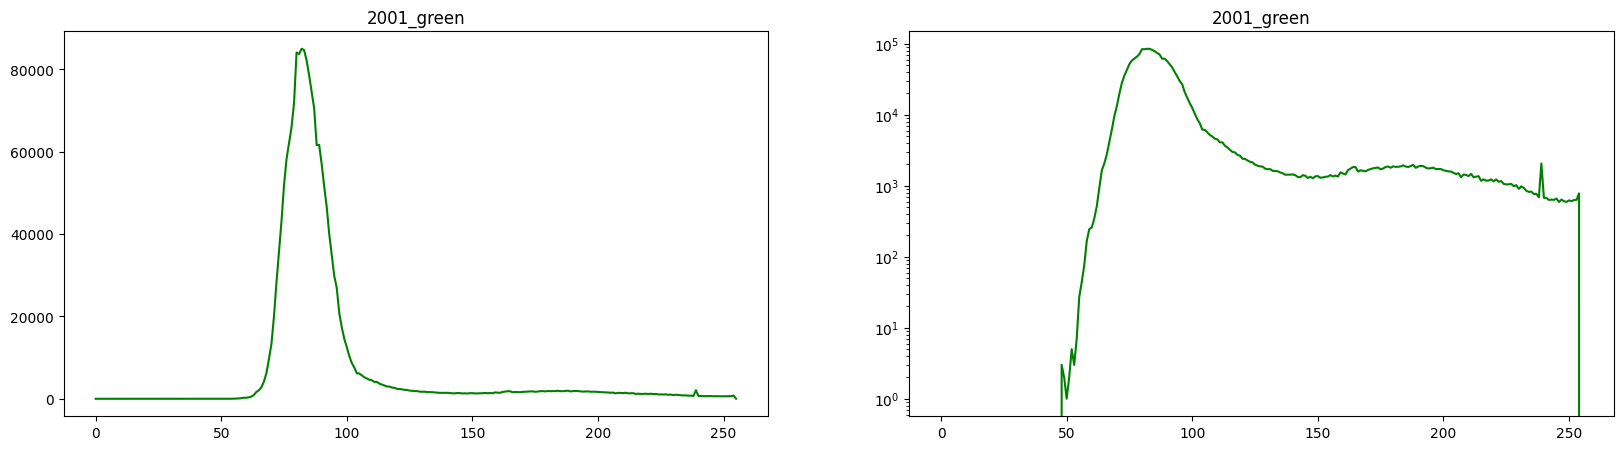

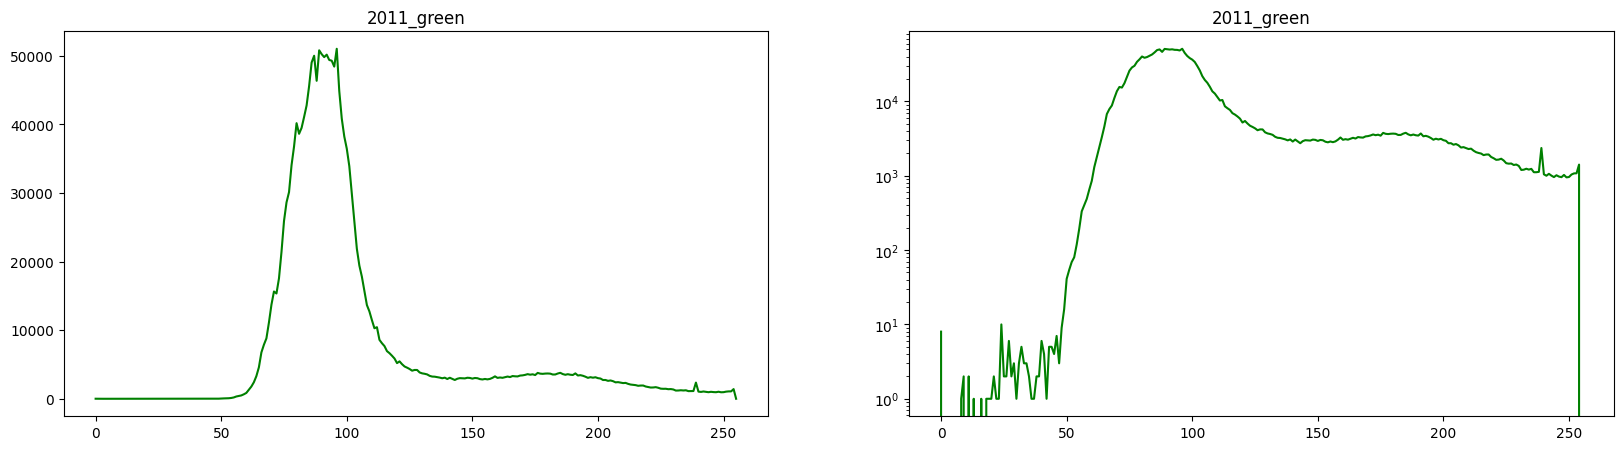

In [4]:
#Ploting log and linear histogram
def draw_hist(image,title=" "):
  histg=cv2.calcHist([image],[0],None,[256],[0,255]) #linear

  #Linear histogram
  plt.figure(figsize=[20,5])
  plt.subplot(121)
  plt.plot(histg,'g')
  plt.title(title)

  #log histogram
  plt.subplot(122)
  plt.plot(histg,'g')
  plt.yscale('log')
  plt.title(title);

#Calling funtion
draw_hist(g1,'1985_green')
draw_hist(g2,'1993_green')
draw_hist(g3,'2001_green')
draw_hist(g4,'2011_green')

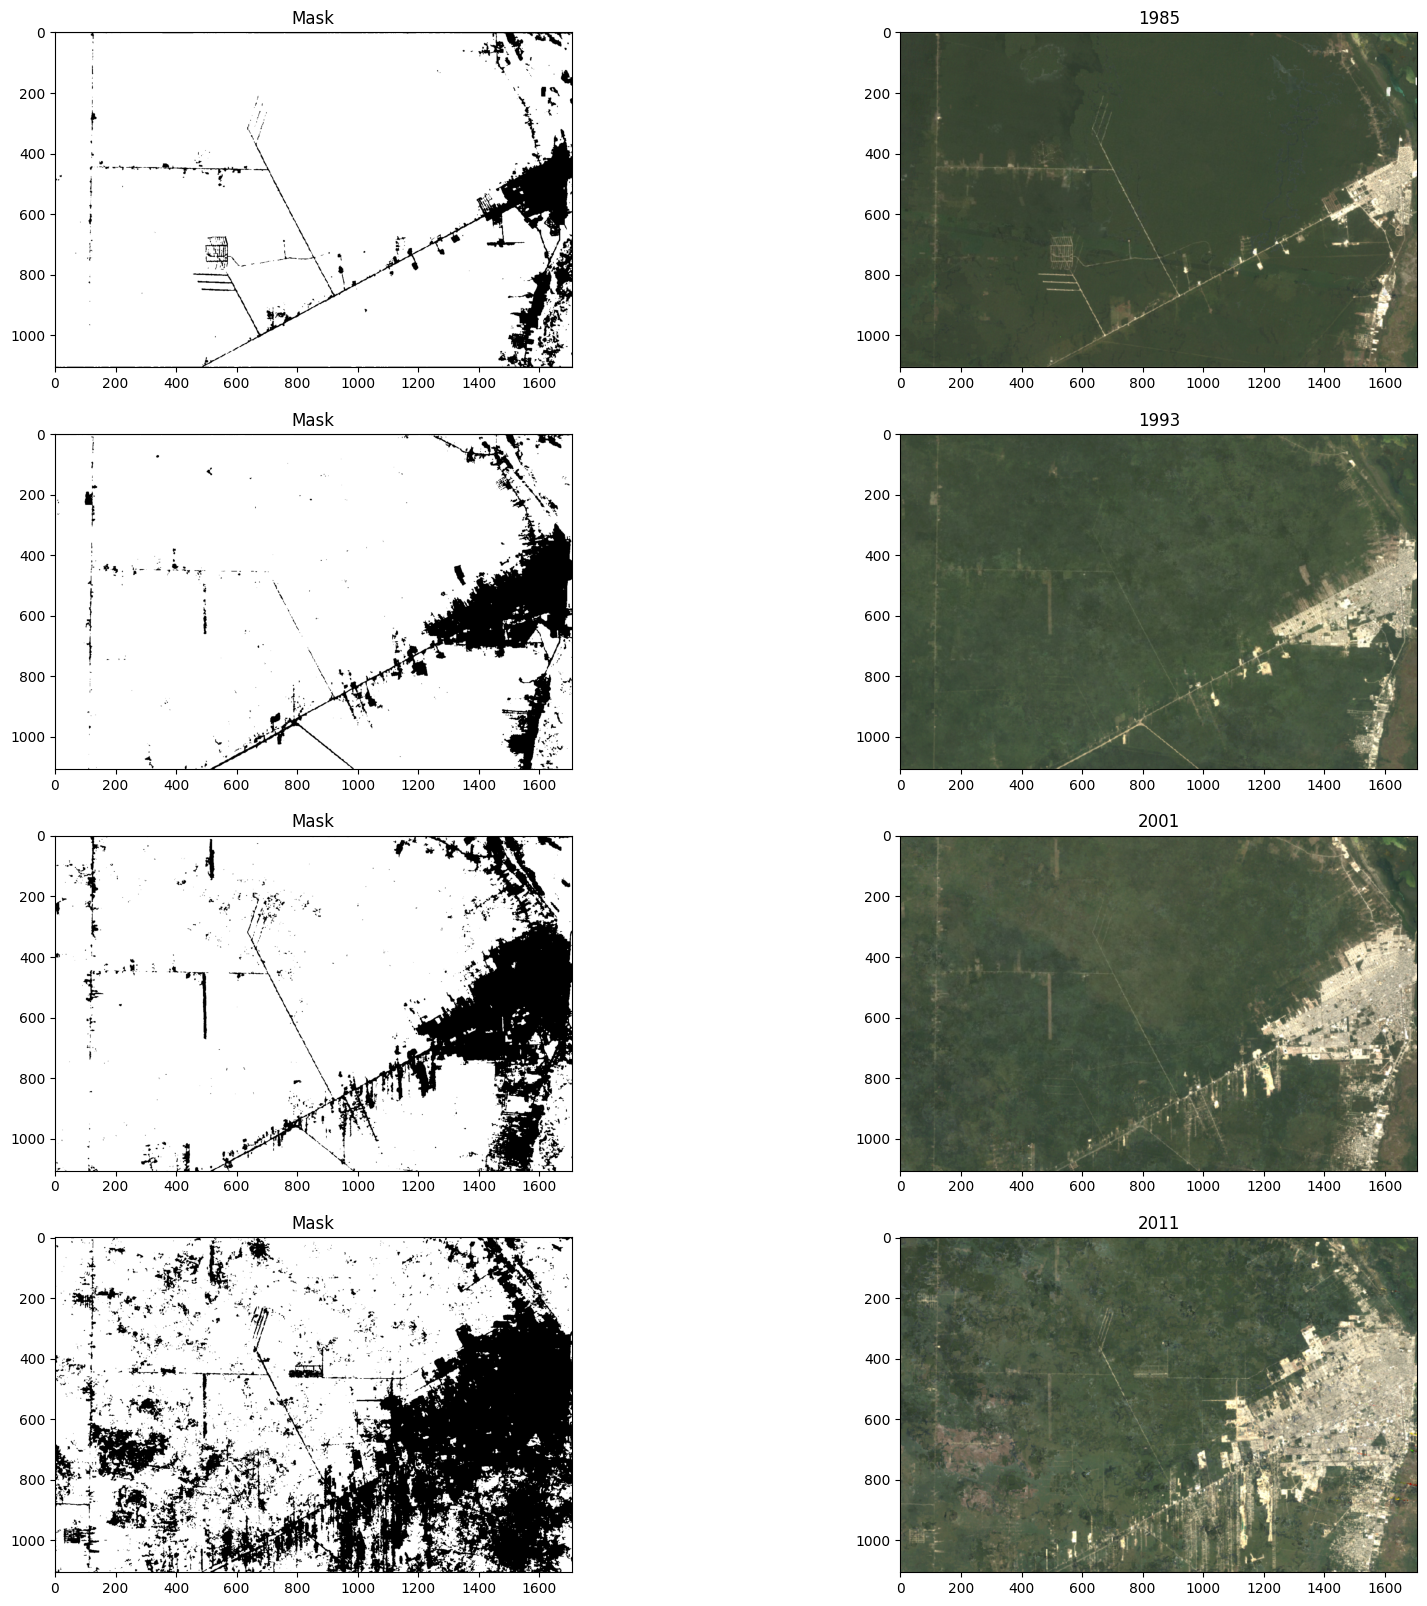

In [7]:
#Inrange to form the mask for color images
#lower and upper values are computed using the histogram's highest peak
lower_BGR_values = np.array([0, 50, 0], dtype = 'uint8')
upper_BGR_values = np.array([255, 100, 255], dtype = 'uint8')
mask_1985=cv2.inRange(f1985,lower_BGR_values,upper_BGR_values)
mask_1993=cv2.inRange(f1993,lower_BGR_values,upper_BGR_values)
mask_2001=cv2.inRange(f2001,lower_BGR_values,upper_BGR_values)
mask_2011=cv2.inRange(f2011,lower_BGR_values,upper_BGR_values)

#Display of the result of Inrange method
plt.figure(figsize=[20,20])
plt.subplot(421)
plt.imshow(mask_1985)
plt.title('Mask')

plt.subplot(422)
plt.imshow(f1985[:,:,::-1])
plt.title('1985')

plt.subplot(423)
plt.imshow(mask_1993)
plt.title('Mask')

plt.subplot(424)
plt.imshow(f1993[:,:,::-1])
plt.title('1993')

plt.subplot(425)
plt.imshow(mask_2001)
plt.title('Mask')

plt.subplot(426)
plt.imshow(f2001[:,:,::-1])
plt.title('2001')

plt.subplot(427)
plt.imshow(mask_2011)
plt.title('Mask')

plt.subplot(428)
plt.imshow(f2011[:,:,::-1])
plt.title('2011');

In [8]:
#Post-processing step

#Calculate the green area from the images of the year 1985, 1993, 2001, 2011

no_pixel=cv2.countNonZero(mask_1985)
tot=mask_1985.shape[0]*mask_1985.shape[1]
green_percentage=round((no_pixel/tot)*100,2)
print('In 1985=',green_percentage)

no_pixel1=cv2.countNonZero(mask_1993)
tot1=mask_1993.shape[0]*mask_1993.shape[1]
green_percentage1=round((no_pixel1/tot1)*100,2)
print('In 1993=',green_percentage1)

no_pixel2=cv2.countNonZero(mask_2001)
tot2=mask_2001.shape[0]*mask_2001.shape[1]
green_percentage2=round((no_pixel2/tot2)*100,2)
print('In 2001=',green_percentage2)

no_pixel3=cv2.countNonZero(mask_2011)
tot3=mask_2011.shape[0]*mask_2011.shape[1]
green_percentage3=round((no_pixel3/tot3)*100,2)
print('In 2011=',green_percentage3)

In 1985= 93.43
In 1993= 90.4
In 2001= 84.63
In 2011= 65.78
